# Инициализация проекта

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [344]:
df_red = pd.read_csv('../data/winequality-red.csv', sep=";")
df_white = pd.read_csv('../data/winequality-white.csv', sep=";")

df_red["type"] = "red"
df_white["type"] = "white"

data = pd.concat([df_red, df_white])

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# Исследование исходных данных

<font size=4>
Датасет содержит следующие поля:

-   `fixed acidity` — фиксированная (титрируемая) кислотность
-    `volatile acidity` — летучая кислотность
-    `citric acid` — лимонная кислота
-    `residual sugar` — остаточный сахар
-    `chlorides` — хлориды
-    `free sulfur dioxide` — свободный диоксид серы
-    `total sulfur dioxide` — общий диоксид серы
-    `density` — плотность
-    `pH` — pH (водородный показатель)
-    `sulphates` — сульфаты
-    `alcohol` — спирт (алкоголь)
-    `quality` — качество
-    `type` — тип вина
</font>


In [345]:
data.info()

<class 'pandas.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   str    
dtypes: float64(11), int64(1), str(1)
memory usage: 710.6 KB


In [346]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


<font size=4><b>Получили следующую характеристику исходных данных:</b>

- столбцов с пропушенными столбцами нет
- тип вина представлен str
- все остальные атрибуты - float64
</font>

In [347]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Коррекция типов данных

In [348]:
float_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']
int_features = ['free sulfur dioxide', 'total sulfur dioxide', 'quality']

data[float_features] = data[float_features].astype("float32")
data[int_features] = data[int_features].astype("int32")

dict_type = {
    "red": 1,
    "white": 0}
data['type'] = data['type'].map(dict_type).astype("int32")

data.info()

<class 'pandas.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float32
 1   volatile acidity      6497 non-null   float32
 2   citric acid           6497 non-null   float32
 3   residual sugar        6497 non-null   float32
 4   chlorides             6497 non-null   float32
 5   free sulfur dioxide   6497 non-null   int32  
 6   total sulfur dioxide  6497 non-null   int32  
 7   density               6497 non-null   float32
 8   pH                    6497 non-null   float32
 9   sulphates             6497 non-null   float32
 10  alcohol               6497 non-null   float32
 11  quality               6497 non-null   int32  
 12  type                  6497 non-null   int32  
dtypes: float32(9), int32(4)
memory usage: 380.7 KB


# EDA

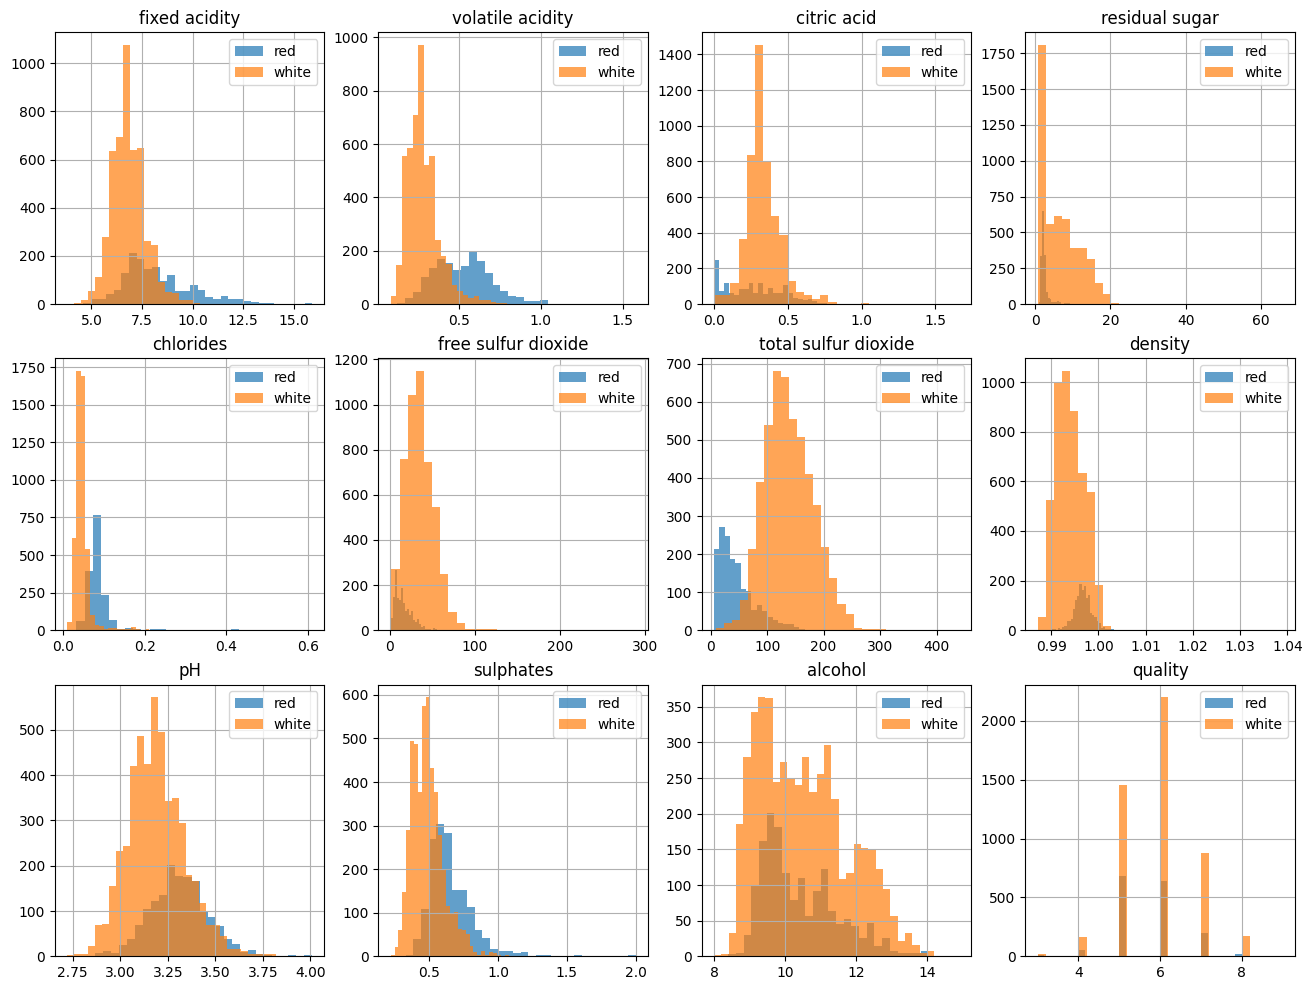

In [349]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(data.columns[:-1]):
    data[data['type'] == 1][col].hist(ax=axes[i], alpha=0.7, label='red', bins=30)
    data[data['type'] == 0][col].hist(ax=axes[i], alpha=0.7, label='white', bins=30)
    axes[i].set_title(col)
    axes[i].legend()

Из графиков видно, что данных для `white` вина значительно больше, и некоторые характеристики значительно отличаются от типа.
Так же видно, что некоторые признаки содержат явные выбросы, усложняющие чтение данных

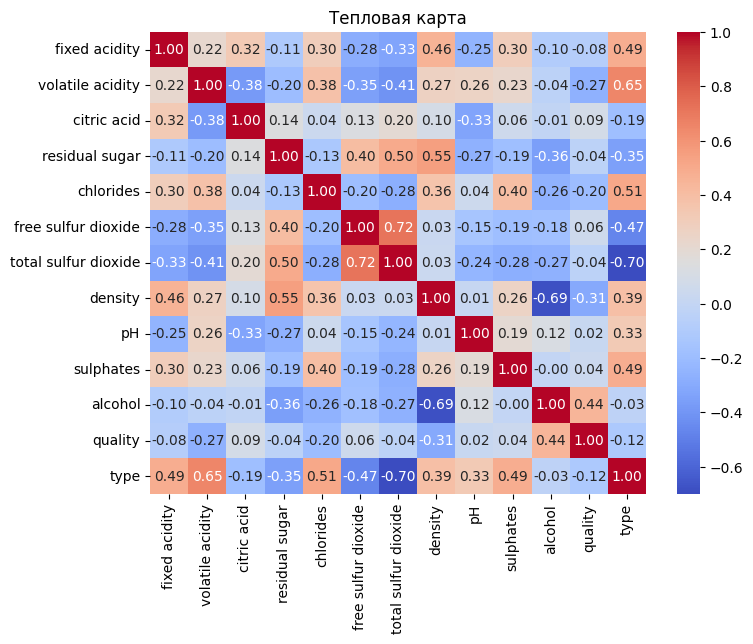

In [350]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта')
plt.show()

<font size=4>
Анализируя цветовую карту, можно сделать выводы:

- `fixed acidity` имеет сильную прямую корреляцию с типом вина `type` (0.49) и обратную корреляцию с признаками `total sulfur dioxide` (-0.38), `free sulfur dioxide` (-0.28), `pH` (-0.25). То есть фиксированная кислотность обратно коррелируется с содержанием серы и показателем pH.
- `volatile acidity` демонстрирует самую сильную положительную корреляцию с типом вина `type` (0.65), что указывает на её важность для классификации.
- `free sulfur dioxide` и `total sulfur dioxide` имеют сильную корреляцию (0,72)
- `density` сильно коррелирует с `residual sugar` (0.55) и имеет обратную связь с `aluminum` (-0.69), что логично, так как сахар увеличивает плотность.
- `sulfates` отрицательно коррелируют с типом вина `type` (-0.43), что означает их противоположное влияние на классификацию по сравнению с кислотностью.
- `chlorides` умеренно коррелирует с несколькими признаками, включая `volatile acidity` (0.38) и `free sulfur dioxide` (0.70).
- Большинство остальных корреляций слабые (<0.3), что указывает на относительную независимость этих признаков.
</font>

**Обработка выбросов**

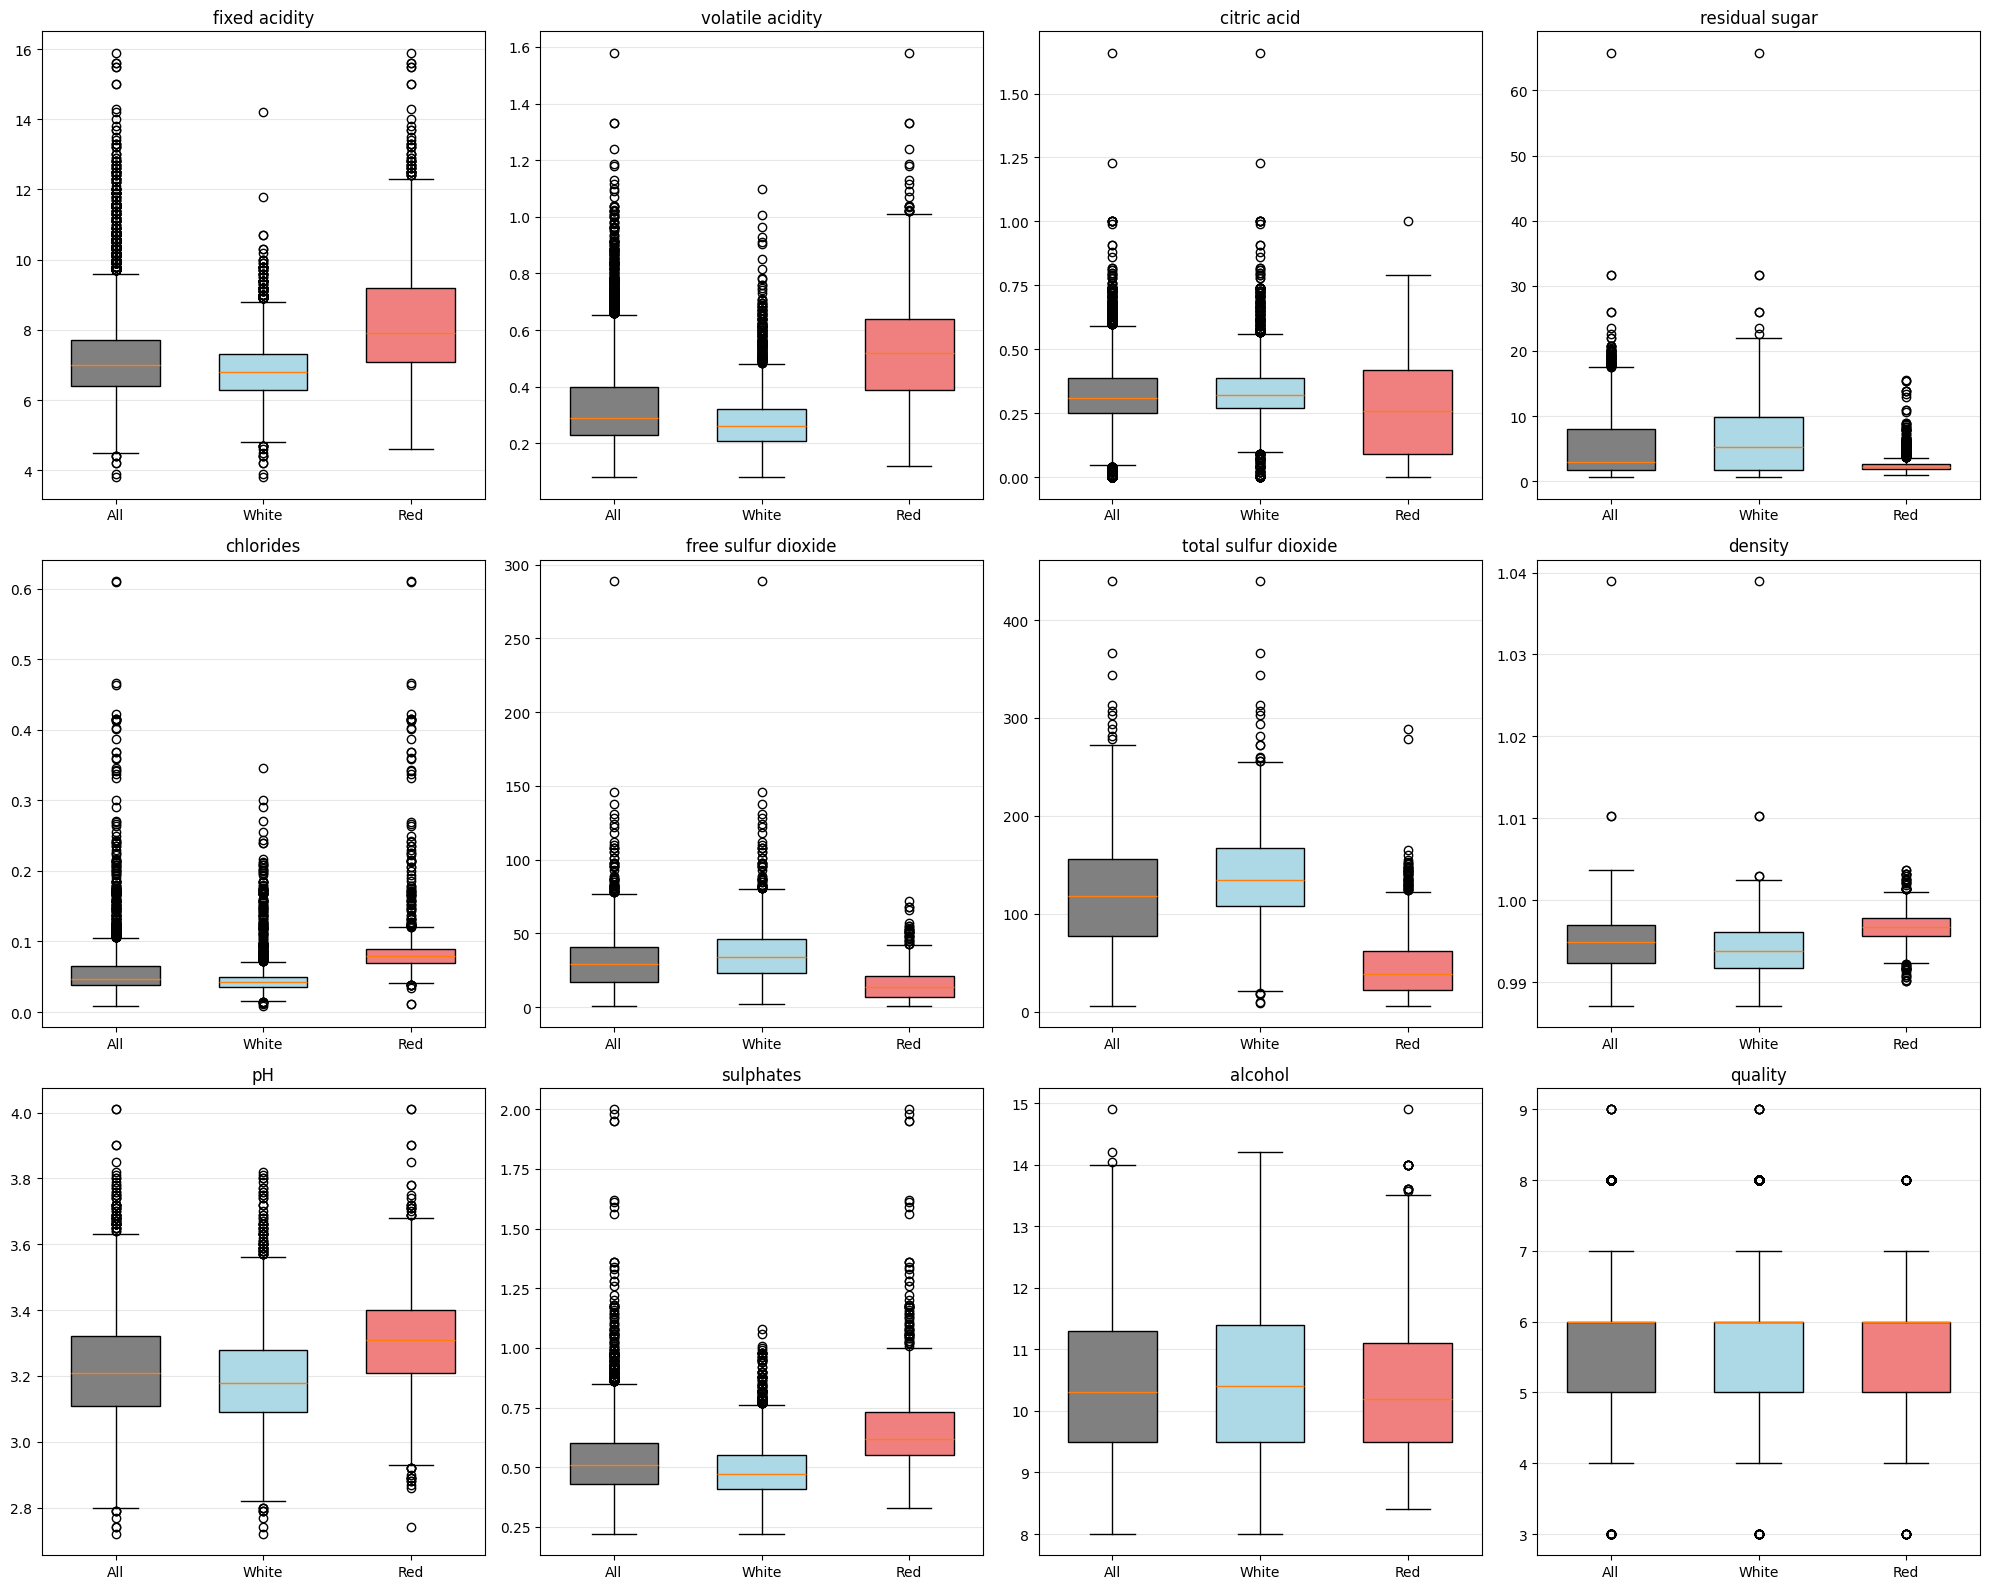

In [351]:
feature_columns = data.columns.drop('type')

plt.figure(figsize=(20, 16))

for i, column in enumerate(feature_columns, 1):
    plt.subplot(3, 4, i)
    
    all_values = data[column].values
    white_values = data[data['type'] == 0][column].values
    red_values = data[data['type'] == 1][column].values
    
    bp = plt.boxplot([all_values, white_values, red_values], 
                     tick_labels=['All', 'White', 'Red'],
                     patch_artist=True,
                     widths=0.6)
    
    colors = ['gray', 'lightblue', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.title(f'{column}')
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [352]:
def remove_extreme_outliers(df, feature, multiplier=3.0):
    df_clean = df.copy()
    
    for wine_type in [0, 1]:
        mask = df_clean['type'] == wine_type
        class_data = df_clean.loc[mask, feature]
        
        Q1 = class_data.quantile(0.25)
        Q3 = class_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        outliers = (class_data < lower_bound) | (class_data > upper_bound)
        outlier_indices = class_data[outliers].index
        
        if len(outlier_indices) > 0:
            df_clean = df_clean.drop(index=outlier_indices)
    
    return df_clean

def smart_outlier_handling(df):
    df_clean = df.copy()
    feature_columns = df.columns.drop('type')
    
    lite_features = ['free sulfur dioxide', 'total sulfur dioxide', 'fixed acidity', 'volatile acidity', 'citric acid']
    for col in lite_features:
        df_clean = remove_extreme_outliers(df_clean, col, multiplier=4.0)
    
    other_features = [col for col in feature_columns if col not in lite_features]
    for col in other_features:
        df_clean = remove_extreme_outliers(df_clean, col, multiplier=3.0)
    
    return df_clean

data_final = smart_outlier_handling(data)

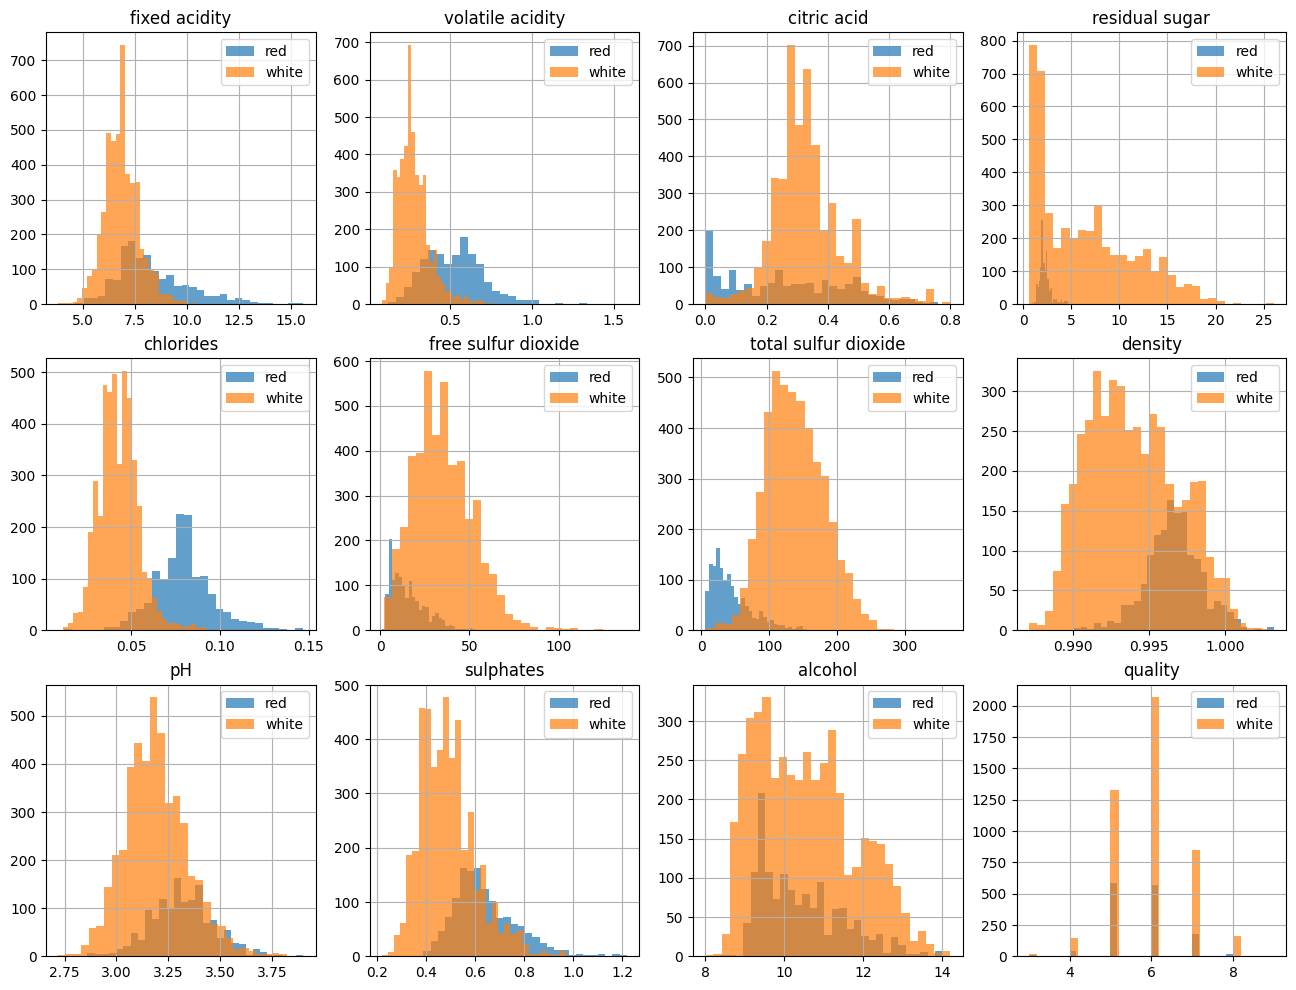

In [353]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(data_final.columns[:-1]):
    data_final[data_final['type'] == 1][col].hist(ax=axes[i], alpha=0.7, label='red', bins=30)
    data_final[data_final['type'] == 0][col].hist(ax=axes[i], alpha=0.7, label='white', bins=30)
    axes[i].set_title(col)
    axes[i].legend()

In [354]:
data_final.to_csv("../data/final_data_wine.csv")

# Визуальный анализ выбросов

Для выявления аномальных значений был использован метод визуализации с помощью ящиков с усами (boxplots). Анализ проводился раздельно для красных и белых вин, так как глобальный анализ по всему датасету мог бы привести к некорректным выводам.

На полученных графиках можно наблюдать следующие закономерности:

*   **Признаки с выраженными межклассовыми различиями:**
    *   `total sulfur dioxide` и `free sulfur dioxide` имеют принципиально разные распределения для красных и белых вин. Для белых вин характерны высокие значения, которые на общем boxplot'е выглядят как выбросы, но фактически являются нормой для данного класса.
    *   `volatile acidity` и `chlorides` также демонстрируют заметные различия между классами, что подтверждает их важность для классификации.

*   **Признаки со схожими распределениями:**
    *   `alcohol`, `pH`, `density` и `regular shugar` имеют значительное перекрытие распределений, что указывает на их меньшую информативность при разделении классов. Они имеют различия, именно, в числовых характеристиках

**Логика обработки выбросов**

Учитывая специфику задачи (бинарная классификация), был применен дифференцированный подход к обработке выбросов:

1.  **Класс-специфичная обработка:** Все процедуры очистки выполнялись отдельно для красных и белых вин, чтобы сохранить естественные различия между классами.
2.  **Консервативный подход для ключевых признаков:** Для признаков `total sulfur dioxide` и `free sulfur dioxide` использовался более мягкий порог отсечения, так как их "высокие" значения являются критически важными для идентификации белых вин.
3.  **Стандартный подход для остальных признаков:** Для остальных числовых признаков применялось стандартное правило межквартильного размаха (IQR) с коэффициентом 1.5.



# Итог по исследовательскому анализу данных (EDA)

В ходе выполнения лабораторной работы был проведен первичный анализ и предобработка данных о химическом составе красных и белых вин (winequality). Основная цель — подготовить чистый и информативный набор данных для последующего решения задачи классификации типа вина.

1. Загрузка и первичный осмотр данных:

Датасет был сформирован путем объединения двух отдельных файлов для красных и белых вин. Для идентификации класса вина был добавлен категориальный признак type.

Проверка на пропуски (data.info()) показала их полное отсутствие, что является сильной стороной исходных данных и позволило сразу перейти к их анализу и обработке.

2. Коррекция типов данных:

Для оптимизации памяти и корректной работы алгоритмов машинного обучения была проведена оптимизация типов данных: вещественные признаки (fixed acidity, alcohol и др.) приведены к типу float32, целочисленные (free sulfur dioxide, quality) — к int32. Категориальный признак type был преобразован в числовой формат (red → 1, white → 0).

3. Разведочный анализ (EDA) и предобработка:

Визуализация распределений: Гистограммы распределения признаков по классам наглядно продемонстрировали, что выборка несбалансирована (белых вин значительно больше). Также было замечено, что некоторые характеристики (например, total sulfur dioxide, free sulfur dioxide, volatile acidity) имеют кардинально разные диапазоны значений для красных и белых вин. Это подтвердило необходимость раздельной обработки данных при очистке от выбросов.

Корреляционный анализ: Тепловая карта корреляций позволила выявить ключевые взаимосвязи. Наиболее важным для классификации оказался признак volatile acidity, имеющий самую сильную корреляцию с типом вина (0.65). Также была подтверждена логичная обратная связь между alcohol и density (-0.69) и прямая между density и residual sugar (0.55).

- Анализ выбросов: Для визуализации аномалий были построены "ящики с усами" (boxplots) для каждого числового признака, также раздельно для двух типов вин. Этот анализ показал наличие экстремальных значений, особенно в признаках, связанных с содержанием серы.

- Обработка выбросов: Был разработан и применен дифференцированный подход к обработке выбросов.

Ключевая идея подхода заключалась в раздельной обработке для красных и белых вин, чтобы сохранить их естественные различия.

Для признаков total sulfur dioxide и free sulfur dioxide, где высокие значения являются отличительной чертой белых вин, использовался более мягкий множитель (4.0) для удаления экстремальных выбросов, чтобы случайно не удалить важные для классификации данные.

Для остальных признаков применялось стандартное правило IQR с коэффициентом 3.0. Такой подход позволил очистить данные от шума, сохранив при этом важные межклассовые различия.

4. Общий вывод:

В результате проделанной работы получен очищенный от пропусков и выбросов датасет (data_final) с оптимизированной структурой. Проведенный анализ позволил:

Лучше понять структуру данных и выявить признаки, наиболее значимые для разделения классов (volatile acidity, total sulfur dioxide).

Обнаружить и устранить аномальные значения, способные исказить результаты моделирования.

Разработать обоснованную стратегию предобработки, учитывающую специфику каждого класса вин.

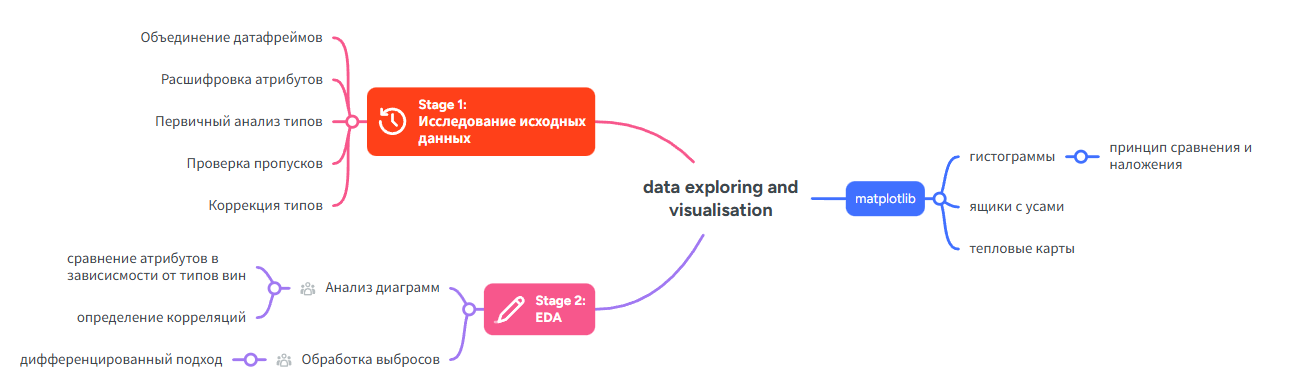